# WELCOME TO FORECASTING


Asisten  :
1. I Putu Adhitya Pratama Mangku Purnama  : 0831-9292-5747
2. Wiweko Dwitya Anindito : 0812-8359-8159



##[QNA DISINI!!!](https://its.id/m/qna_forecast24)#

<img src="https://i.imgflip.com/8sqhdn.jpg"/>

credits to:
1. Ega Fernanda Putra
2. Muhammad Raffi Priyadiantama  

# 0. EDA

In [ ]:
# Import library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Import data

url = 'https://drive.google.com/file/d/1wy8F9qajLn4n7HpcKzxEeBpA3FEAi6Rt/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

## Pre-process

In [ ]:
# Print data

data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# Print info data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# Ubah kolom Month ke format DateTime lalu jadikan index

data['Month'] = pd.to_datetime(data['Month'], format='%Y-%m') # Convert Month to DateTime
data = data.set_index('Month') # Set Month as index
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
# Ubah nama kolom passengers

data.columns = ['Passengers']

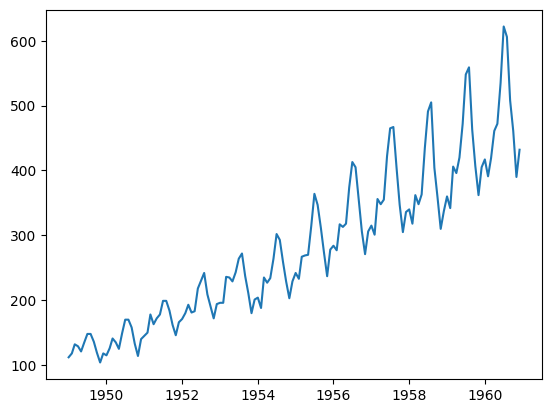

In [ ]:
# Plot data

plt.plot(data)

# 1. Decomposition

Decomposition berfungsi untuk membagi time series menjadi komponen:

<img src='https://belajar-sac.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F9b27ad10-da39-4c02-a2f8-fd1d41b38a2a%2Fa70bf248-726e-4b8f-a8bb-917c57543836%2FUntitled.png?table=block&id=cd994745-e684-45de-b8f9-1f7bfaeb39c1&spaceId=9b27ad10-da39-4c02-a2f8-fd1d41b38a2a&width=1200&userId=&cache=v2'/>

1.   **Seasonality**: variasi siklus yang tetap yang berulang pada interval tetap.
2.   **Trend**: secara keseluruhan naik / turun.
3.   **Noise**: variabilitas data yang tidak dapat dijelaskan.

**Manfaat Decomposition adalah untuk:**
*   Menunjukkan fluktuasi tren
*   Memberikan wawasan tentang faktor-faktor mendasar yang memengaruhi time series


In [ ]:
# Duplicate data

data_decomposition = data.copy()
data_decomposition.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Dekomposisi Aditif

<img src='https://analyticsindiamag.com/wp-content/uploads/2021/08/image-251.png' />

\begin{align}
        \text{Y} = \text{T} + \text{S} + \text{R}
\end{align}

* Cocok digunakan ketika variasi musiman relatif
konstan dari waktu ke waktu.

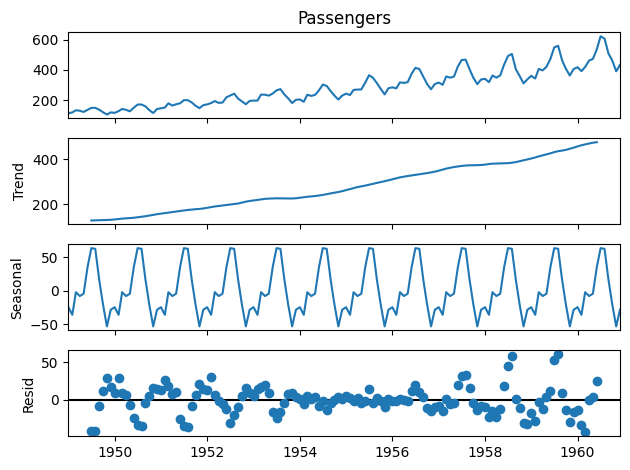

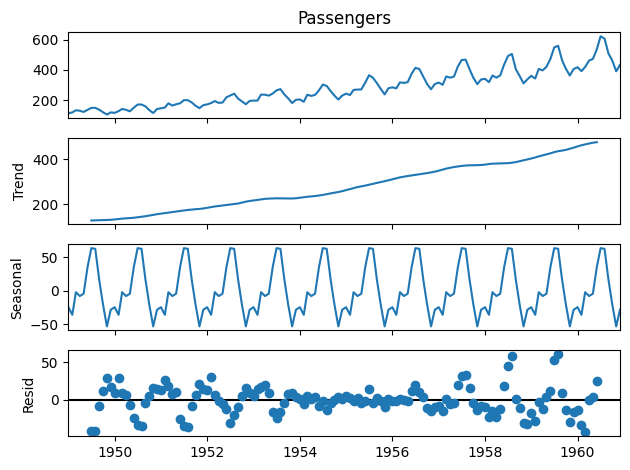

In [ ]:
# Dekomposisi data secara additive

from statsmodels.tsa.seasonal import seasonal_decompose

additive_decomposition = seasonal_decompose(data_decomposition['Passengers'], model='additive') # additive seasonal index
additive_decomposition.plot()

### Dekomposisi Multiplikatif

<img src='https://analyticsindiamag.com/wp-content/uploads/2021/08/image-251.png' />

\begin{align}
        \text{Y} = \text{T} \cdot \text{S} \cdot \text{R}
\end{align}

* Cocok digunakan ketika variasi musiman meningkat atau menurun dari waktu ke waktu.

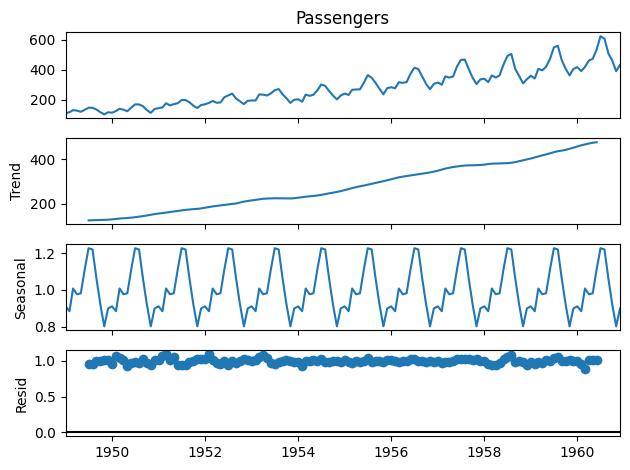

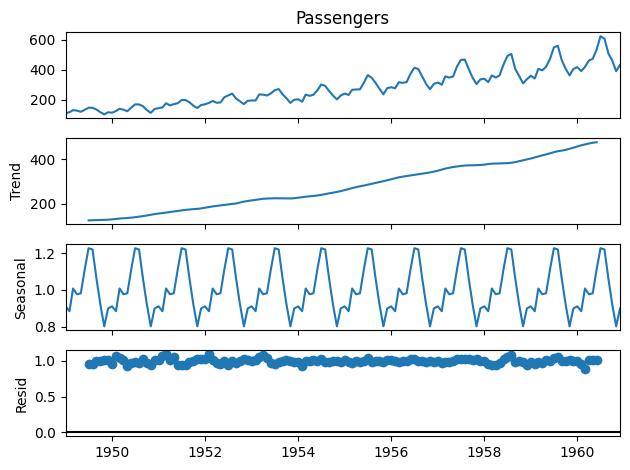

In [ ]:
# Dekomposisi data secara multiplicative

multiplicative_decomposition = seasonal_decompose(data_decomposition['Passengers'], model='multiplicative') # multiplicative seasonal index
multiplicative_decomposition.plot()

# 2. Moving Average


**Moving Average (MA)**

Moving Average (MA) adalah metode statistik untuk merata-ratakan data dalam rentang waktu tertentu Ini membantu mengidentifikasi tren atau pola dalam dataset.Ada beberapa jenis MA, termasuk:

- **Simple Moving Average (SMA):** Merata-ratakan data dengan bobot yang sama.
  
- **Double Moving Average:** Menggunakan dua tingkat moving average untuk sinyal yang lebih halus.

- **Weighted Moving Average (WMA):** Memberikan bobot berbeda untuk penekanan pada data terkini.

- **Centered Moving Average:** Merata-ratakan data di sekitar titik tertentu dengan bobot simetris.

Perbedaannya terletak pada metode perhitungan dan bobot yang digunakan, disesuaikan dengan kebutuhan analisis data dan tingkat responsivitas yang diinginkan.

## 1.1 Simple Moving Average
**Simple Moving Average (SMA):** Merata-ratakan data dengan bobot yang sama.

Rumus yang digunakan
<img src="https://belajar-sac.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F9b27ad10-da39-4c02-a2f8-fd1d41b38a2a%2Fb4bbfcad-7c1b-4232-83a7-e570ceb4c04a%2FUntitled.png?table=block&id=57e7f320-11a0-4864-87b0-1fd4a81a0507&spaceId=9b27ad10-da39-4c02-a2f8-fd1d41b38a2a&width=1190&userId=&cache=v2"/>

Contoh study case:
<img src="https://www.notion.so/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F9b27ad10-da39-4c02-a2f8-fd1d41b38a2a%2F261fb9eb-575f-41af-822c-90635f85ee0b%2FUntitled.png?table=block&id=6ebeb6f4-c384-4c45-8322-5d2c3480b3b2&spaceId=9b27ad10-da39-4c02-a2f8-fd1d41b38a2a&width=2000&userId=e23757cd-5288-4b33-9d52-35d47ca9b43b&cache=v2"/>

#### Load Dataset

In [ ]:
# Load and Read Dataset
SMA = data.copy()
SMA.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


#### Pre-process & Visualizatoin

In [ ]:
# Ganti nama kolom ke Passengers
SMA.columns = ['Passengers']

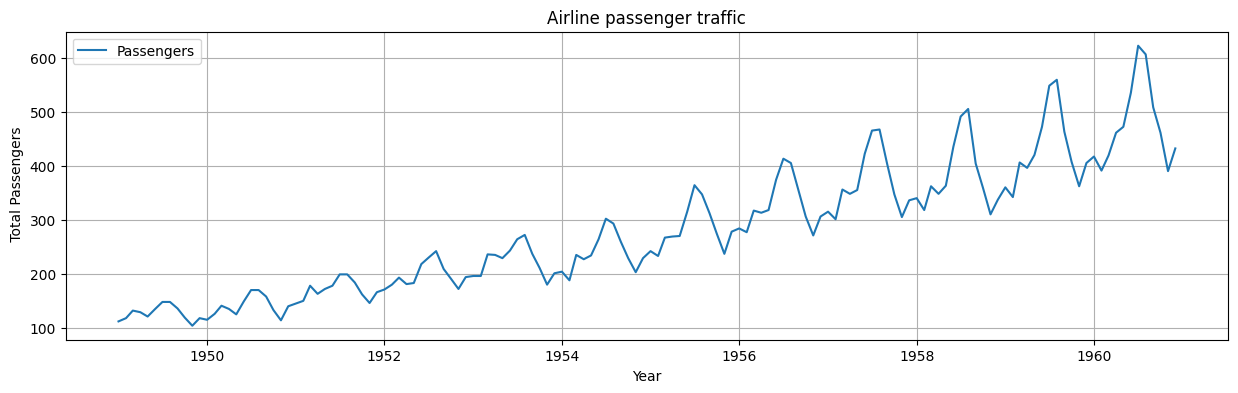

In [ ]:
# Plot the time series SMA
plt.figure(figsize=(15, 4))
plt.plot(SMA, label='Passengers')  # Add a label for the legend
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic')
plt.show()

#### Train, Forecasting, Plot, and Evaluating

In [ ]:
# Simple moving average method
ma_window = 12
SMA['sma_forecast'] = SMA['Passengers'].rolling(ma_window).mean()
# Drop rows with NaN values in the 'sma_forecast' column
SMA.dropna(subset=['sma_forecast'], inplace=True)

In [ ]:
SMA

,Passengers,sma_forecast
Month,,
1949-12-01,118,126.666667
1950-01-01,115,126.916667
1950-02-01,126,127.583333
1950-03-01,141,128.333333
1950-04-01,135,128.833333
...,...,...
1960-08-01,606,463.333333
1960-09-01,508,467.083333
1960-10-01,461,471.583333


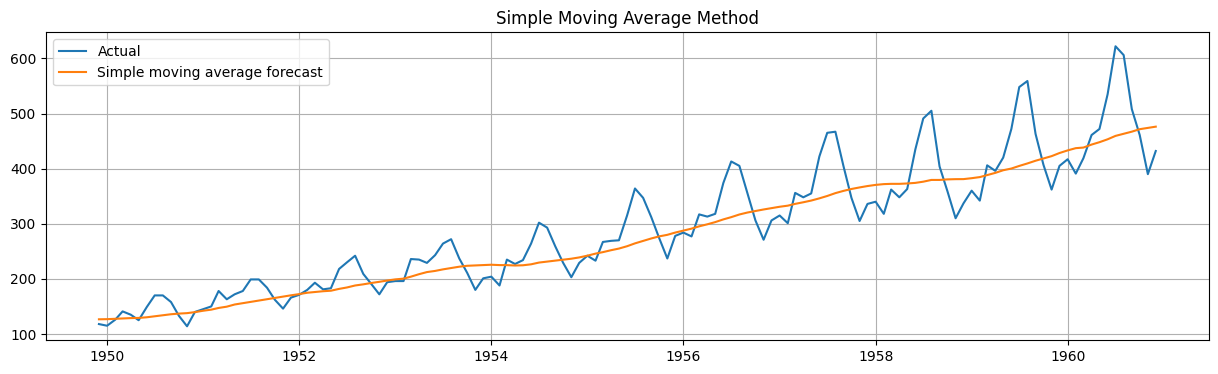

In [ ]:
#Plot train, test and forecast
plt.figure(figsize=(15,4))
plt.grid()
plt.plot(SMA['Passengers'], label='Actual')
plt.plot(SMA['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [ ]:
#Calculate RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(SMA['Passengers'], SMA['sma_forecast'])).round(2)
mape = np.round(np.mean(np.abs(SMA['Passengers']-SMA['sma_forecast'])/SMA['Passengers'])*100,2)

results = pd.DataFrame({'Method':['Simple moving average forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,48.01,10.78


## 1.2 Double Moving Average
**Double Moving Average (DMA):** Menggunakan dua tingkat moving average untuk sinyal yang lebih halus

Rumus yang digunakan
<img src="https://belajar-sac.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F9b27ad10-da39-4c02-a2f8-fd1d41b38a2a%2F4882b3d7-1d00-40c3-95f0-462f4832a11b%2FUntitled.png?table=block&id=fc03c82e-0749-4933-8acd-cea54bf4a7d0&spaceId=9b27ad10-da39-4c02-a2f8-fd1d41b38a2a&width=1420&userId=&cache=v2"/>



#### Import Library and Read DMAset

In [ ]:
## !pip install pandas
## !pip install matplotlib
## !pip install numpy

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load and Read DMAset
DMA = data.copy()
DMA.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Preprocess DMA and Visualization

In [ ]:
# ganti nama klom
DMA.columns = ['Passengers']

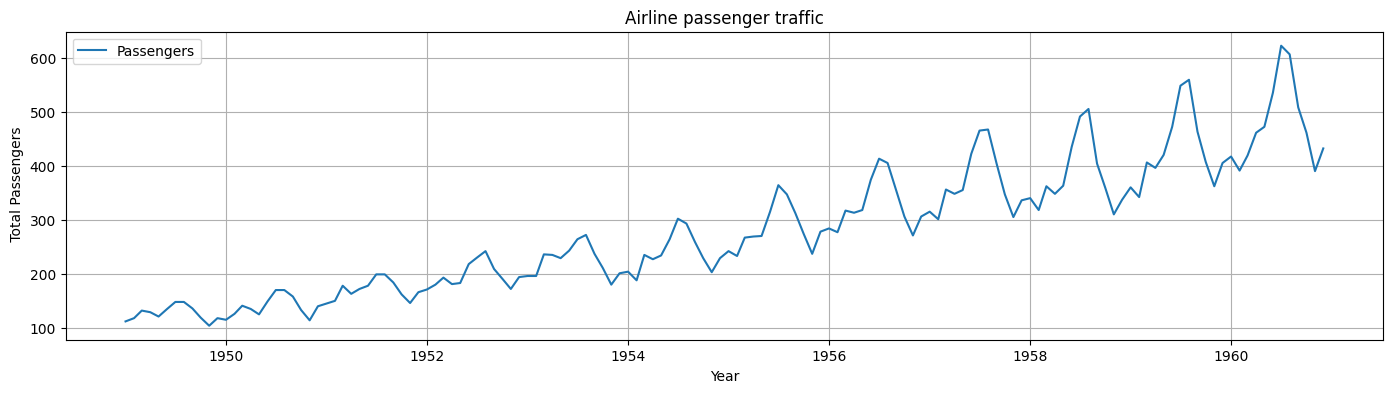

In [ ]:
# Plot the time series DMA
plt.figure(figsize=(17, 4))
plt.plot(DMA, label='Passengers')  # Add a label for the legend
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic')
plt.show()

#### Forecasting and Evaluating

In [ ]:
# First Moving Average
DMA['3_month_MA_1'] = 0.00
for i in range(len(DMA)-3):
    DMA.loc[DMA.index[i + 3], '3_month_MA_1'] = np.mean([DMA['Passengers'][i], DMA['Passengers'][i+1], DMA['Passengers'][i+2]])
DMA.head(6)

,Passengers,3_month_MA_1
Month,,
1949-01-01,112,0.000000
1949-02-01,118,0.000000
1949-03-01,132,0.000000
1949-04-01,129,120.666667
1949-05-01,121,126.333333
1949-06-01,135,127.333333


In [ ]:
# Second Moving Average
DMA['3_month_MA_2'] = 0.00
for i in range(3, len(DMA)-3):
    DMA.loc[DMA.index[i + 3], '3_month_MA_2'] = np.mean( [ DMA['3_month_MA_1'][i], DMA['3_month_MA_1'][i+1], DMA['3_month_MA_1'][i+2] ])
DMA.head(8)

,Passengers,3_month_MA_1,3_month_MA_2
Month,,,
1949-01-01,112,0.000000,0.000000
1949-02-01,118,0.000000,0.000000
1949-03-01,132,0.000000,0.000000
1949-04-01,129,120.666667,0.000000
1949-05-01,121,126.333333,0.000000
1949-06-01,135,127.333333,0.000000
1949-07-01,148,128.333333,124.777778
1949-08-01,148,134.666667,127.333333


In [ ]:
# Forecast Result
DMA['DMA_Forecast'] = 0.00
for i in range(3, len(DMA)-3):
   DMA.loc[DMA.index[i + 3], 'DMA_Forecast'] = 2 * DMA['3_month_MA_1'][i+2] - DMA['3_month_MA_2'][i+2] + (2/(3-1))*(DMA['3_month_MA_1'][i+2] - DMA['3_month_MA_2'][i+2])
DMA.head(8)

,Passengers,3_month_MA_1,3_month_MA_2,DMA_Forecast
Month,,,,
1949-01-01,112,0.000000,0.000000,0.000000
1949-02-01,118,0.000000,0.000000,0.000000
1949-03-01,132,0.000000,0.000000,0.000000
1949-04-01,129,120.666667,0.000000,0.000000
1949-05-01,121,126.333333,0.000000,0.000000
1949-06-01,135,127.333333,0.000000,0.000000
1949-07-01,148,128.333333,124.777778,382.000000
1949-08-01,148,134.666667,127.333333,135.444444


![forecast formula](https://miro.medium.com/v2/resize:fit:1196/1*bhBn4CNhhB5Z-AtLc9vJ0g.png)

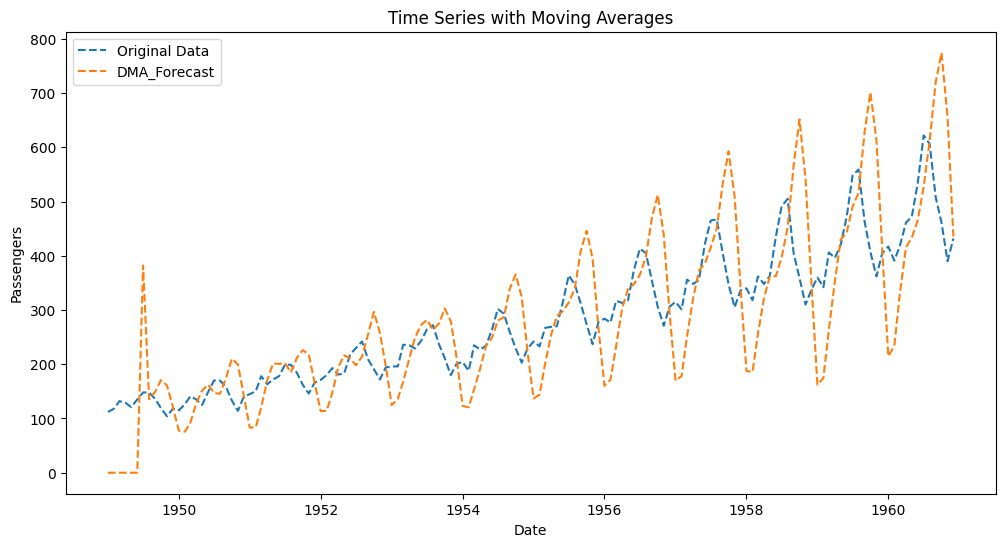

In [ ]:
# Plot the original time series and the calculated moving averages
plt.figure(figsize=(12, 6))
plt.plot(DMA['Passengers'], label='Original Data', linestyle='--')
plt.plot(DMA['DMA_Forecast'], label='DMA_Forecast', linestyle='--')

plt.title('Time Series with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.show()

In [ ]:
# Calculate RMSE and MAPE for the entire dataset
rmse = np.sqrt(mean_squared_error(DMA['Passengers'], DMA['DMA_Forecast'])).round(2)
mape = np.round(np.mean(np.abs(DMA['Passengers'] - DMA['DMA_Forecast']) / DMA['Passengers']) * 100, 2)

# Display results
results = pd.DataFrame({'Method': ['DMA Forecast'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
print(results)

         Method    RMSE   MAPE
0  DMA Forecast  102.85  29.74


## 1.3 Weight Moving Average
Memberikan bobot berbeda untuk penekanan pada data terkini.

Rumus yang digunakan
<img src="https://belajar-sac.notion.site/image/https%3A%2F%2Fprod-files-secure.s3.us-west-2.amazonaws.com%2F9b27ad10-da39-4c02-a2f8-fd1d41b38a2a%2Ff67460ee-a66d-4304-9041-1c5f5c0eb4fa%2FUntitled.png?table=block&id=e1879ac8-ecac-4391-8af1-1d61ba483db7&spaceId=9b27ad10-da39-4c02-a2f8-fd1d41b38a2a&width=2000&userId=&cache=v2"/>

#### Import Library and Read WMAset

In [ ]:
# Load and Read DMAset
WMA = data.copy()
WMA.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Preprocess WMA and Visualization

In [ ]:
# Ganti nama kolom
WMA.columns = ['Passengers']

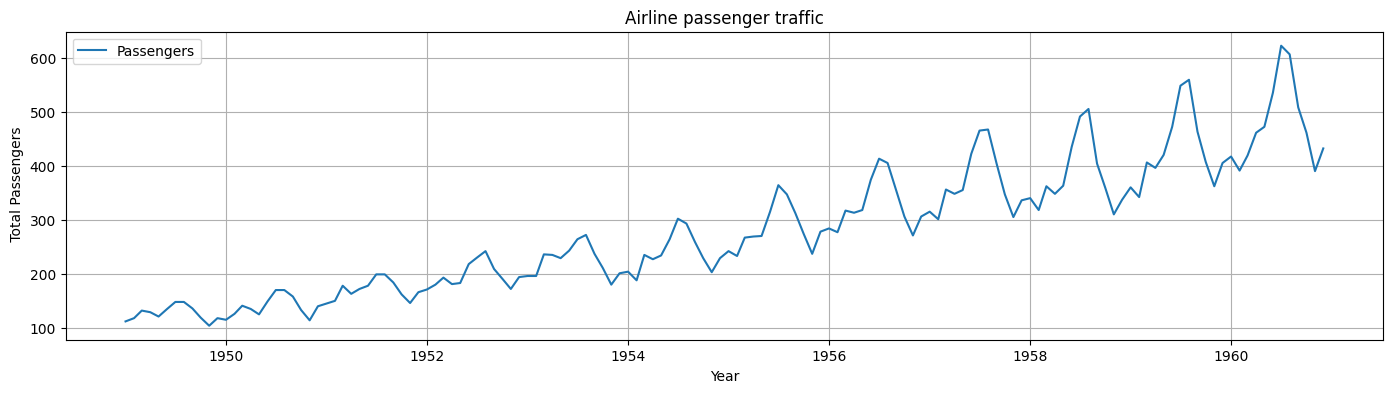

In [ ]:
# Plot the time series CMA
plt.figure(figsize=(17, 4))
plt.plot(WMA, label='Passengers')  # Add a label for the legend
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic')
plt.show()

#### Forecasting and Evaluating

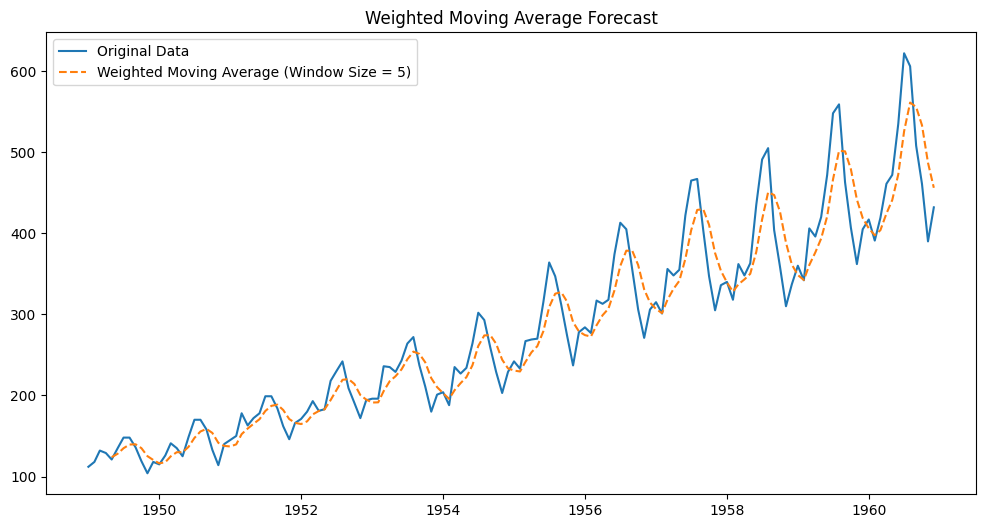

In [ ]:

# Assuming DMA is already loaded and formatted as described

# Define weights for the Weighted Moving Average
weights = [0.1, 0.15, 0.2, 0.25, 0.3]  # Adjust weights as needed
window_size = len(weights)

# Calculate Weighted Moving Average (WMA)
WMA['WMA'] = WMA['Passengers'].rolling(window=window_size).apply(lambda x: (x * weights).sum() / sum(weights), raw=True)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(WMA['Passengers'], label='Original Data')
plt.plot(WMA['WMA'], label=f'Weighted Moving Average (Window Size = {window_size})', linestyle='--')
plt.title('Weighted Moving Average Forecast')
plt.legend()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming DMA and WMA are already calculated and in the DataFrame

# Drop rows with NaN values in the original data and WMA forecast
WMA_cleaned = WMA.dropna(subset=['Passengers', 'WMA'])  # Assuming 'Passengers' and 'WMA' are column names

# Define the original data and WMA forecast columns in your cleaned DataFrame
original_data_cleaned = WMA_cleaned['Passengers']
wma_forecast_cleaned = WMA_cleaned['WMA']

# Calculate RMSE and MAPE for the cleaned dataset
rmse_wma_cleaned = np.sqrt(mean_squared_error(original_data_cleaned, wma_forecast_cleaned)).round(2)
mape_wma_cleaned = np.round(np.mean(np.abs(original_data_cleaned - wma_forecast_cleaned) / original_data_cleaned) * 100, 2)

# Display results for WMA with cleaned data
results_wma_cleaned = pd.DataFrame({'Method': ['Weighted Moving Average'], 'MAPE': [mape_wma_cleaned], 'RMSE': [rmse_wma_cleaned]})
results_wma_cleaned = results_wma_cleaned[['Method', 'RMSE', 'MAPE']]
print(results_wma_cleaned)


                    Method   RMSE  MAPE
0  Weighted Moving Average  33.45  8.41


# 3. Eksponential Smoothing
Exponential smoothing adalah metode moving average yang memberikan bobot menurun secara eksponensial terhadap nilai observasi yang lebih tua.

In [ ]:
# Load Data
ES = data.copy()
ES.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


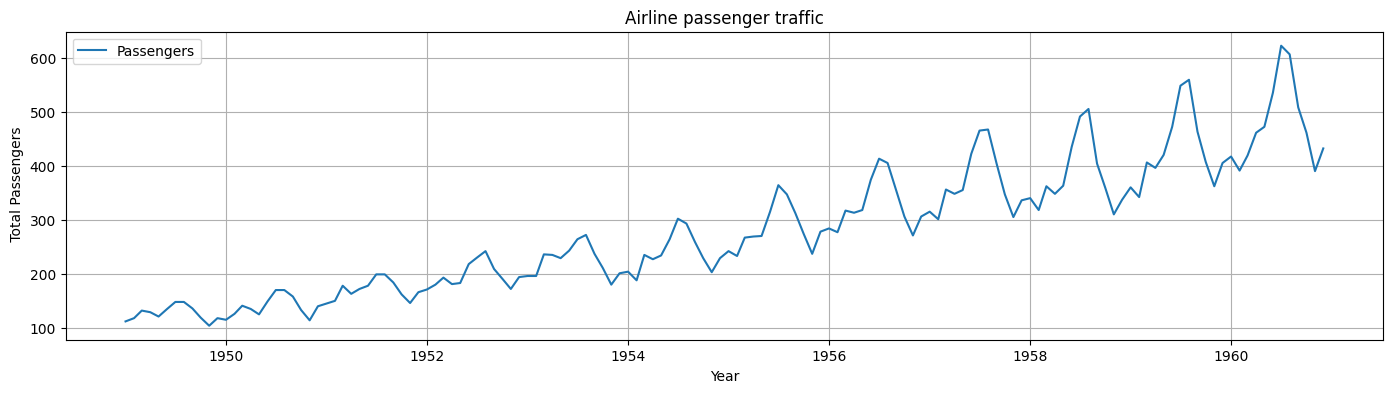

In [ ]:
# Plot the time series SES
plt.figure(figsize=(17, 4))
plt.plot(ES, label='Passengers')  # Add a label for the legend
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Passengers")
plt.legend()
plt.title('Airline passenger traffic')
plt.show()

In [ ]:
import statsmodels.api as sm

model = sm.tsa.SimpleExpSmoothing(ES['Passengers'])
ses_model = model.fit(smoothing_level=0.3)
ES['SES_Forecast'] = ses_model.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


In [ ]:
model2 = sm.tsa.ExponentialSmoothing(ES['Passengers'], trend='add')
des_model = model2.fit(smoothing_level=0.3, smoothing_slope=0.2)
ES['DES_Forecast'] = des_model.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-97-352069c630f4>:2: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  des_model = model2.fit(smoothing_level=0.3, smoothing_slope=0.2)


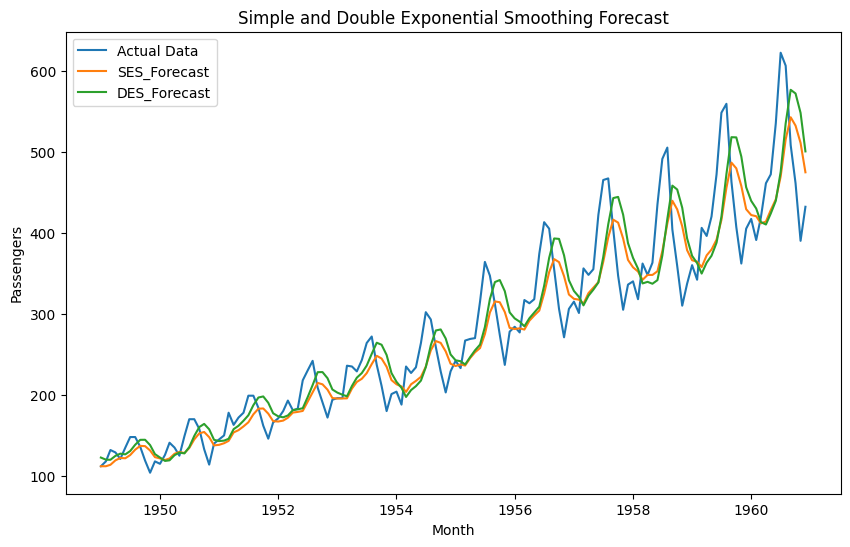

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(ES['Passengers'], label='Actual Data')
plt.plot(ES['SES_Forecast'], label='SES_Forecast')
plt.plot(ES['DES_Forecast'], label='DES_Forecast')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.title('Simple and Double Exponential Smoothing Forecast')
plt.legend()
plt.show()

In [ ]:
ES

,Passengers,SES_Forecast,DES_Forecast
Month,,,
1949-01-01,112,112.000000,122.701308
1949-02-01,118,112.000000,120.112100
1949-03-01,132,113.800000,119.972928
1949-04-01,129,119.260000,124.797132
1949-05-01,121,122.182000,127.526247
...,...,...,...
1960-08-01,606,515.119942,534.894376
1960-09-01,508,542.383959,576.259698
1960-10-01,461,532.068772,571.719841


In [ ]:
# Evaluasi

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# SES
mse_ses = mean_squared_error(ES['Passengers'], ES['SES_Forecast'])
mape_ses = mean_absolute_percentage_error(ES['Passengers'], ES['SES_Forecast'])

# Auto ARIMA
mse_des = mean_squared_error(ES['Passengers'], ES['DES_Forecast'])
mape_des = mean_absolute_percentage_error(ES['Passengers'], ES['DES_Forecast'])

# Print sebagai dataframe biar rapi
pd.DataFrame({'Metrik':['MSE', 'MAPE'], 'SES': [mse_ses, mape_ses], 'DES': [mse_des, mape_des]})

,Metrik,SES,DES
0,MSE,2090.284339,2707.805729
1,MAPE,0.112442,0.132530


# 4. AutoRegressive Integrated Moving Average (ARIMA)

<img src='https://d1rwhvwstyk9gu.cloudfront.net/2023/07/Forecasting-Stock-Returns-Using-ARIMA-Model.png' />

ARIMA terdiri dari tiga komponen:

1. **AR (AutoRegressive) (p):**
   - Melakukan peramalan dengan melihat nilai masa lalu.
   - Parameter **p**  menunjukkan lag (berapa periode sebelumnya) yang digunakan.

2. **I (Integrated) (d):**
   - Untuk membuat data menjadi "stasioner".
   - Dilakukan sebanyak **d** kali dengan mengurangkan nilai saat ini dengan nilai pada waktu sebelumnya .


3. **MA (Moving Average) (q):**
   - Melakukan peramalan dengan melihat error masa lalu.
   - Parameter **q** menunjukan lag (berapa periode sebelumnya) yang digunakan.

[Learn more](https://www.youtube.com/watch?v=3UmyHed0iYE)

*   **Model Auto Regressive (p = 1)**


\begin{equation}
y_t = \beta_1 y_{t-1} + \epsilon_t
\end{equation}

$y_t$ adalah nilai pada lag = 1.

$\beta1$ adalah  koefisien yang pengaruh nilai $y_{t-1}$ pada $y_t$.

$\epsilon_t$ adalah kesalahan acak pada waktu $t$.


---


*   **Model Moving Average (q = 1)**
\begin{equation}
y_t =  \phi_1 \epsilon_{t-1} + \epsilon_t
\end{equation}

$\epsilon_t$ adalah kesalahan acak pada waktu $t$.

$\phi_1$ adalah  koefisien yang pengaruh nilai $e_{t-1}$ pada $e_t$.


---


*   **Model ARIMA (1,1,1)**
\begin{equation}
\Delta y_t = \beta_1 \Delta y_{t-1} + \epsilon_t + \phi_1 \epsilon_{t-1}
\end{equation}



In [ ]:
# Duplicate data

data_arima = data.copy()
data_arima.drop(columns = ['SES_Forecast', 'DES_Forecast'], inplace = True)

## 4.1 Uji ADF

**Augmented Dickey Fuller (ADF Test)** digunakan untuk menguji ke-stasioneran data.

\begin{equation}
H_0 = data \space tidak \space stasioner
\end{equation}

\begin{equation}
H_1 = data \space stasioner  
\end{equation}

<br>

Jika,
\begin{equation}
p-value < 0.05
\end{equation}

maka tolak $H_0$ sehingga **Data stasioner**.

<br>

Jika,
\begin{equation}
p-value \geq 0.05
\end{equation}

maka $H_0$ tidak ditolak sehingga **Data tidak stasioner** dan perlu dilakukan difrensiasi (d).

In [ ]:
data_arima

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [ ]:
# Test adf

from statsmodels.tsa.stattools import adfuller

adf = adfuller(data_arima)

p_value = adf[1]
print(f'p-value = {p_value}')

p-value = 0.991880243437641


In [ ]:
# analisis hasil ADF

if p_value < .05:
  print('Data stasioner')
else:
  print('Data tidak stasioner')

Data tidak stasioner


## 4.2 ACF & PACF

**Autocorrelation Function (ACF) dan Partial Autocorrelation Function (PACF)**
<img src='https://i.postimg.cc/W3VNxyCX/pacf-acf.png' />

ACF dan PACT melakukan uji korelasi Pearson antara data $t$ dengan data masa lalu $t-n$.



*   **ACF**: menunjukan korelasi tidak langsung, contohnya korelasi $t-3$ mempengaruhi $t-2$ mempengaruhi $t-1$ sehingga mempangaruhi $t$.
*   **PACF**: menunjukan korelasi langsung, contohnya korelasi $t-3$ mempengaruhi  $t$.

**Tujuan:**


*   **ACF** digunakan untuk menentukan **q** (parameter moving average)
*   **PACF** digunakan untuk menentukan **p** (parameter auto regressoin)


<h2> <b> !!! ACF & PACF PERLU DILAKUKAN PADA DATA STASIONER** </b> </h2>


[Learn more](https://www.kaggle.com/code/iamleonie/time-series-interpreting-acf-and-pacf)




In [ ]:
# Difrensiasi agar stasioner

data_arima_diff1 = data_arima.diff().dropna()
adf_diff1 = adfuller(data_arima_diff1)
p_value_diff1 = adf_diff1[1]

if p_value_diff1 < .05:
  print('Data stasioner')
else:
  print('Data tidak stasioner')

Data tidak stasioner


In [ ]:
# Difrensiasi agar stasioner #2

data_arima_diff2 = data_arima.diff().diff().dropna()
adf_diff2 = adfuller(data_arima_diff2)
p_value_diff2 = adf_diff2[1]

if p_value_diff2 < .05:
  print('Data stasioner')
else:
  print('Data tidak stasioner')

Data stasioner


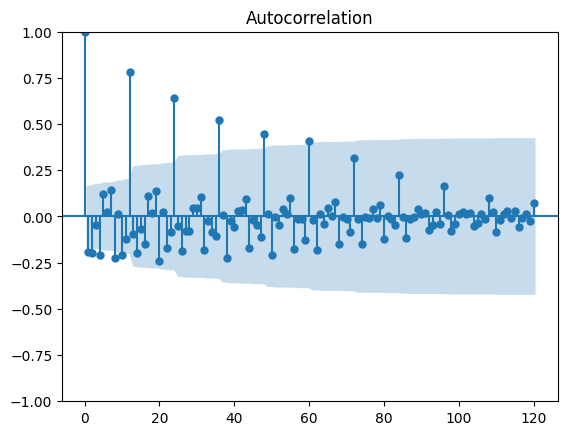

In [ ]:
# Plot ACF

from statsmodels.graphics.tsaplots import plot_acf

acf = plot_acf(data_arima_diff2, lags=120)

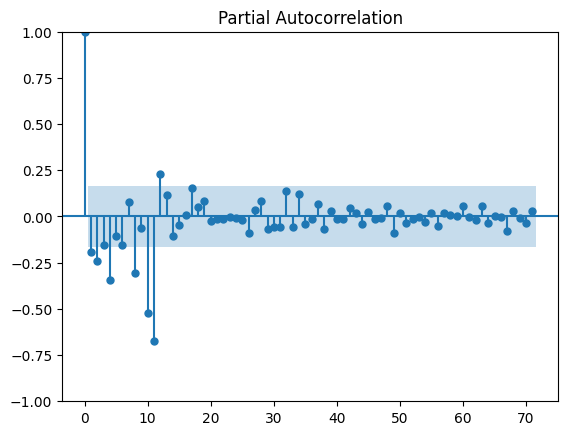

In [ ]:
# Plot PACF

from statsmodels.graphics.tsaplots import plot_pacf

pacf = plot_pacf(data_arima_diff2, lags=71)

**Cara baca**



* Abaikan nilai korelasi yang berada di daerah arsir karena tidak singifikan.
* Pilih nilai korelasi yang menonjol / jauh dari 0


**ACF (p)** = 12, 24, dst.

**PACF (q)** = 10,11,12


## 4.3 Model ARIMA

In [ ]:
# Split dataset

from sklearn.model_selection import train_test_split

train, test = train_test_split(data_arima, train_size = .8, test_size = .2, shuffle = False)

In [ ]:
# Print hasil train-test split

print(f'len data: {len(data_arima)}')
print(f'len train: {len(train)}')
print(f'len test: {len(test)}')

len data: 144
len train: 115
len test: 29


In [ ]:
# Buat model

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order = (12, 2, 11)) # (order= auto regression(p), difference(d), moving average(q))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
# Fit Model

model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# ARIMA Summary

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  115
Model:               ARIMA(12, 2, 11)   Log Likelihood                -418.509
Date:                Thu, 06 Jun 2024   AIC                            885.018
Time:                        04:08:41   BIC                            950.476
Sample:                    01-01-1949   HQIC                           911.580
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1526      0.533     -0.286      0.775      -1.198       0.893
ar.L2         -0.2755      0.476     -0.579      0.563      -1.209       0.658
ar.L3         -0.1551      0.508     -0.306      0.7

In [ ]:
# Forecasting

start_test = test.index[0]
end_test = test.index[-1]

pred = model.predict(start = start_test, end = end_test)

In [ ]:
# Print pred

pred.head()

1958-08-01    490.297107
1958-09-01    441.461682
1958-10-01    384.562851
1958-11-01    347.645060
1958-12-01    376.127230
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# Add Predicted ARIMA data

test['ARIMA (12, 2, 11) Passengers'] = pred
test.head()

,Passengers,"ARIMA (12, 2, 11) Passengers"
Month,,
1958-08-01,505,490.297107
1958-09-01,404,441.461682
1958-10-01,359,384.562851
1958-11-01,310,347.645060
1958-12-01,337,376.127230


<Axes: xlabel='Month'>

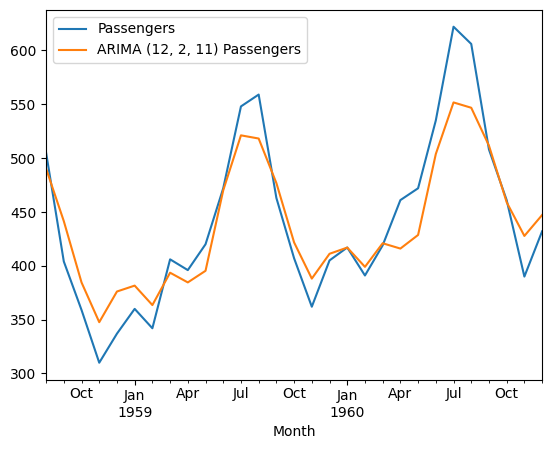

In [ ]:
# Plot

test.plot()

## 4.4 Auto Parameter Arima

**Auto Paramater Arima** dapat mencari kombinasi p, d, q secara otomatis dengan mengoptimasi nilai **Akaike Information Criterion**.

**atau Akaike Information Criterion (AIC)**:
*   Metrik yang membandingkan antara kesesuaian model dengan data dan kompleksitas model.
*   Semakin rendah semakin bagus.



[Dokumentasi Auto ARIMA](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html)



In [ ]:
!pip install pmdarima

In [ ]:
# Import auto arima

from pmdarima import auto_arima

In [ ]:
# Buat model auto arima

auto_model = auto_arima(train, start_p=1, start_q=1, trace=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1058.834, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1076.519, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1069.440, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1064.624, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1076.271, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1061.078, Time=0.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1066.203, Time=0.32 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1058.246, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1063.646, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1068.536, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1058.648, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1057.3

In [ ]:
# Predict

predict_preiod = len(test)

auto_pred = auto_model.predict(n_periods = predict_preiod)
auto_pred.head(5)

1958-08-01    498.516715
1958-09-01    470.586982
1958-10-01    438.544435
1958-11-01    417.758811
1958-12-01    417.758811
Freq: MS, dtype: float64

In [ ]:
# Add Predicted auto ARIMA data

test['Auto ARIMA Passengers'] = auto_pred
test.head()

,Passengers,"ARIMA (12, 2, 11) Passengers",Auto ARIMA Passengers
Month,,,
1958-08-01,505,490.297107,498.516715
1958-09-01,404,441.461682,470.586982
1958-10-01,359,384.562851,438.544435
1958-11-01,310,347.645060,417.758811
1958-12-01,337,376.127230,417.758811


<Axes: xlabel='Month'>

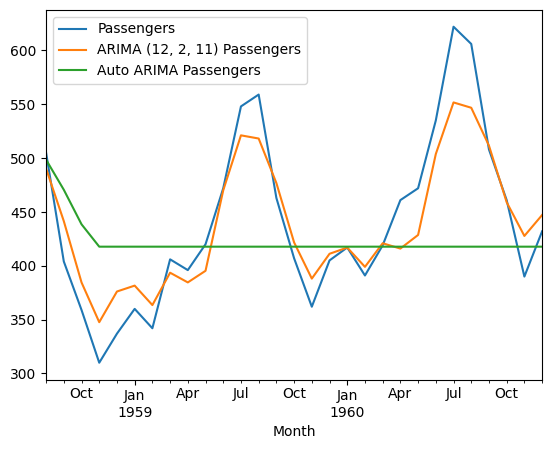

In [ ]:
# Plot

test.plot()

In [ ]:
# Evaluasi

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# ARIMA (12, 2, 11)
mse_arima = mean_squared_error(test['Passengers'], test['ARIMA (12, 2, 11) Passengers'])
mape_arima = mean_absolute_percentage_error(test['Passengers'], test['ARIMA (12, 2, 11) Passengers'])

# Auto ARIMA
mse_auto_arima = mean_squared_error(test['Passengers'], test['Auto ARIMA Passengers'])
mape_auto_arima = mean_absolute_percentage_error(test['Passengers'], test['Auto ARIMA Passengers'])

# Print sebagai dataframe biar rapi
pd.DataFrame({'Metrik':['MSE', 'MAPE'], 'ARIMA (12, 2, 11)': [mse_arima, mape_arima], 'Auto ARIMA': [mse_auto_arima, mape_auto_arima]})

,Metrik,"ARIMA (12, 2, 11)",Auto ARIMA
0,MSE,883.776609,6597.552916
1,MAPE,0.054414,0.134078
